Implementation of the Graham Scan algorithm.

Sources:
    
    - https://en.wikipedia.org/wiki/Graham_scan  (Not 100% clear to me)
    - http://www.dcs.gla.ac.uk/~pat/52233/slides/Hull1x1.pdf

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

We want to sort a set of points in the upper half plane by the angle the point makes with the +ve x-axis.

Thus (x1,y1) <= (x2,y2) if decided by:

   - x1 >= 0 and x2 < 0
   - x2 ==0 and x1 > 0
   - if x1, x2 == 0 then y1 <= y2
   - if x1, x2 > 0 then y1/x1 <= y2/x2
   - and if y1/x1 == y2/x2 then x1 <= x2
   - and finally if x1, x2 < 0 then iff (-x1,y1) >= (-x2,y2)

In [33]:
class UpperHalfPlanePoint:
    def __init__(self, x, y):
        self.x, self.y = x, y
        
    def __repr__(self):
        return "UpperHalfPlanePoint({},{})".format(self.x, self.y)
        
    def __le__(self, rhs):
        # Special case is that (0,0) is the "smallest", so effectively (infty, 0)
        if self.x == 0 and self.y == 0:
            return True
        if rhs.x == 0 and rhs.y == 0:
            return False
        if rhs.x < 0:
            if self.x < 0:
                return UpperHalfPlanePoint(-rhs.x, rhs.y) <= UpperHalfPlanePoint(-self.x, self.y)
            return True
        if rhs.x == 0:
            if self.x > 0:
                return True
            if self.x < 0:
                return False
            return self.y <= rhs.y
        # So now rhs.x > 0
        if self.x <= 0:
            return False
        #slope1 = self.y / self.x
        #slope2 = rhs.y / rhs.x
        #if slope1 < slope2:
        #    return True
        #if slope1 > slope2:
        #    return False
        if self.y * rhs.x < rhs.y * self.x:
            return True
        if self.y * rhs.x > rhs.y * self.x:
            return False
        return self.x <= rhs.x
        
    def __eq__(self, rhs):
        return self <= rhs and rhs <= self
    
    def __ge__(self, rhs):
        return rhs <= self
    
    def __lt__(self, rhs):
        return self <= rhs and not rhs <= self
    
    def __gt__(self, rhs):
        return rhs < self
    
    def __ne__(self, rhs):
        return not self <= rhs or not rhs <= self
    
UpperHalfPlanePoint(0,1) <= UpperHalfPlanePoint(-1,-1)

True

In [165]:
from collections import namedtuple
Point = namedtuple("Point", ["x", "y"])

def colinear(one, two, three):
    """Considers the vectors from one--two and one--three.  Returns:
    0 to indicate colinear
    -ve to indicate three lies on the right of the half-plane from one to two.
    +ve shows on the left."""
    return (two.x-one.x) * (three.y-one.y) - (two.y-one.y) * (three.x-one.x)

def FindExtremePoints(points, leaveColinear = True):
    lowerLeft = points[0]
    for point in points:
        if point.y < lowerLeft.y or ( point.y == lowerLeft.y and point.x < lowerLeft.x ):
            lowerLeft = point
    inUHP = [ UpperHalfPlanePoint(pt.x - lowerLeft.x, pt.y - lowerLeft.y) for pt in points ]
    inUHP.sort()
    #print(points, "-->", lowerLeft)
    #print(inUHP)
    # Need to check for repeated points
    uniques = [inUHP[0]]
    index = 1
    for index in range(1, len(inUHP)):
        if inUHP[index] != inUHP[index - 1]:
            uniques.append(inUHP[index])
    inUHP = uniques
    if len(inUHP) <= 2:
        return [ Point(pt.x + lowerLeft.x, pt.y + lowerLeft.y) for pt in inUHP ]
    # Now implement the Graham Scan algorithm
    convexHull = [inUHP[0], inUHP[1], inUHP[2]]
    index = 3
    while True:
        #direction = ( (convexHull[-2].x - convexHull[-3].x) * (convexHull[-1].y - convexHull[-3].y)
        #             - (convexHull[-2].y - convexHull[-3].y) * (convexHull[-1].x - convexHull[-3].x) )
        direction = colinear(convexHull[-3], convexHull[-2], convexHull[-1])
        if direction < 0 or (leaveColinear == False and direction == 0):
            # Right turn, so reject -2 point
            #print(convexHull[-3], convexHull[-2], convexHull[-1], "Right")
            del convexHull[-2]
            #newBack = convexHull.pop()
            #convexHull.pop()
            #convexHull.append(newBack)
            # If we delete colinears then possible to run out of points!
            if len(convexHull) < 3:
                if index == len(inUHP):
                    break
                convexHull.append( inUHP[index] )
                index += 1
        else:
            #print(convexHull[-3], convexHull[-2], convexHull[-1], "Left")
            if index == len(inUHP):
                break
            convexHull.append( inUHP[index] )
            index += 1

    return [ Point(pt.x + lowerLeft.x, pt.y + lowerLeft.y) for pt in convexHull ]

In [166]:
# So difficult corner cases!
print(FindExtremePoints([Point(0,0), Point(2,2)]))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1)]))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1)], False))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1), Point(3,3)]))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1), Point(3,3)], False))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1), Point(3,3), Point(0,5)]))
print(FindExtremePoints([Point(0,0), Point(2,2), Point(1,1), Point(3,3), Point(0,5)], False))

[Point(x=0, y=0), Point(x=2, y=2)]
[Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2)]
[Point(x=0, y=0), Point(x=2, y=2)]
[Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2), Point(x=3, y=3)]
[Point(x=0, y=0), Point(x=3, y=3)]
[Point(x=0, y=0), Point(x=1, y=1), Point(x=2, y=2), Point(x=3, y=3), Point(x=0, y=5)]
[Point(x=0, y=0), Point(x=3, y=3), Point(x=0, y=5)]


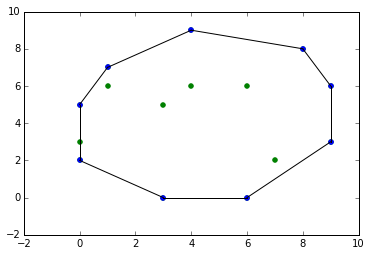

In [170]:
import random
points = [Point(random.randrange(10), random.randrange(10)) for _ in range(15)]
extpts = FindExtremePoints( points, False )
fig, ax = plt.subplots()
ax.scatter([pt.x for pt in points], [pt.y for pt in points], color = "green")
ax.scatter([pt.x for pt in extpts], [pt.y for pt in extpts], color = "blue")
for i in range(len(extpts)-1):
    ax.plot( [extpts[i].x, extpts[i+1].x], [extpts[i].y, extpts[i+1].y], color = "black" )
ax.plot( [extpts[-1].x, extpts[0].x], [extpts[-1].y, extpts[0].y], color = "black" )

# Application to 2D Linear Programming

[Point(x=0, y=0),
 Point(x=40.0, y=2.0),
 Point(x=340.0, y=97.0),
 Point(x=360.0, y=147.0),
 Point(x=370.0, y=177.0),
 Point(x=330.0, y=175.0),
 Point(x=30.0, y=80.0),
 Point(x=10.0, y=30.0)]

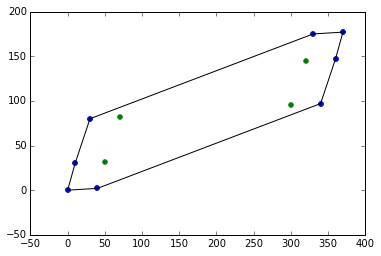

In [197]:
data = [
[10.0000, 30.0000],
[20.0000, 50.0000],
[300.0000, 95.0000],
[40.0000, 2.0000] ]

points = []
for n in range(2**len(data)):
    t = [ (n>>i)&1 for i in range(len(data)) ]
    x = sum(ti * pair[0] for ti, pair in zip(t,data))
    y = sum(ti * pair[1] for ti, pair in zip(t,data))
    points.append(Point(x,y))

extpts = [Point(0,0)]
for (x,y) in data:
    pt = Point(x, y)
    points = extpts[:] + [Point(p.x + pt.x, p.y + pt.y) for p in extpts]
    extpts = FindExtremePoints( points, False )
    
fig, ax = plt.subplots()
ax.scatter([pt.x for pt in points], [pt.y for pt in points], color = "green")
ax.scatter([pt.x for pt in extpts], [pt.y for pt in extpts], color = "blue")
for i in range(len(extpts)-1):
    ax.plot( [extpts[i].x, extpts[i+1].x], [extpts[i].y, extpts[i+1].y], color = "black" )
ax.plot( [extpts[-1].x, extpts[0].x], [extpts[-1].y, extpts[0].y], color = "black" )
extpts

([Point(x=0, y=0),
  Point(x=40.0, y=80.0),
  Point(x=50.0, y=380.0),
  Point(x=70.0, y=1380.0),
  Point(x=370.0, y=29880.0),
  Point(x=330.0, y=29800.0),
  Point(x=320.0, y=29500.0),
  Point(x=300.0, y=28500.0)],
 Point(x=50.0, y=3750.0))

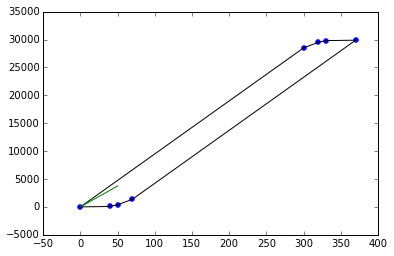

In [200]:
data = [
[10.0000, 30.0000],
[20.0000, 50.0000],
[300.0000, 95.0000],
[40.0000, 2.0000] ]
data = [ [pair[0], pair[0]*pair[1]] for pair in data ]
extpts = [Point(0,0)]
for (x,y) in data:
    pt = Point(x, y)
    points = extpts[:] + [Point(p.x + pt.x, p.y + pt.y) for p in extpts]
    extpts = FindExtremePoints( points, False )

aim = [5000.0000, 75.0000]
aim = [aim[0], aim[0] * aim[1]]
scale = 100
aim = Point(aim[0] / scale, aim[1] / scale)

fig, ax = plt.subplots()
ax.scatter([pt.x for pt in extpts], [pt.y for pt in extpts], color = "blue")
for i in range(len(extpts)-1):
    ax.plot( [extpts[i].x, extpts[i+1].x], [extpts[i].y, extpts[i+1].y], color = "black" )
ax.plot( [extpts[-1].x, extpts[0].x], [extpts[-1].y, extpts[0].y], color = "black" )
ax.plot( [0, aim[0]], [0, aim[1]], color = "green" )
extpts, aim

In [208]:
def IntersectSegmentVector(seg0, seg1, vec):
    """Finds if the line segment from `seg0` to `seg1` intersects the
    half-line in the direction of `vec`.  Returns the value of t>0 with
    vec / t in the line segment, or 0."""
    det = (seg1.x - seg0.x) * vec.y - (seg1.y - seg0.y) * vec.x
    if det == 0:
        if vec.x * seg0.y == vec.y * seg0.x:
            if seg0.x == 0:
                if seg1.x == 0:
                    return 0
                return vec.x / seg1.x
            if seg1.x == 0:
                return vec.x / seg0.x
            return min( vec.x / seg0.x, vec.x / seg1.x )
        return 0
    s = (vec.y * seg1.x - vec.x * seg1.y) / det
    if s < 0 or s > 1:
        return 0
    invt = ( (seg0.y - seg1.y) * seg1.x - (seg0.x - seg1.x) * seg1.y ) / det
    if invt <= 0:
        return 0
    return 1 / invt

print( IntersectSegmentVector(Point(0.2,0.8), Point(1,1), Point(0.2,0.5)) )

0.6


In [184]:
def FindMinScale(convexHull, vector):
    """Input: convexHull is a list of extreme points of a convex set.
    Assumes convexHull[0] = Point(0,0) and ordering is counter-clockwise.
    Find the minimal t so that vector / t is in convexHull
    Returns 0 if t = infinity is the answer."""
    if colinear(convexHull[0], convexHull[1], vector) < 0:
        return 0
    if colinear(convexHull[0], convexHull[-1], vector) > 0:
        return 0
    t = 0
    for i in range(len(convexHull)-1):
        tnew = IntersectSegmentVector( convexHull[i], convexHull[i+1], vector)
        if tnew != 0 and ( t == 0 or tnew < t ):
            t = tnew
    tnew = IntersectSegmentVector( convexHull[-1], convexHull[0], vector)
    if tnew != 0 and ( t == 0 or tnew < t ):
        t = tnew
    return t

In [202]:
aim = [5000.0000, 75.0000]
aim = [aim[0], aim[0] * aim[1]]
FindMinScale(extpts, Point(aim[0], aim[1]))

18.975332068311197

## Hard Case

([Point(x=0, y=0),
  Point(x=0.0001, y=0.008839830000000002),
  Point(x=100.0, y=8839.83999999),
  Point(x=99.9999, y=8839.83116016)],
 Point(x=100.0, y=8839.83))

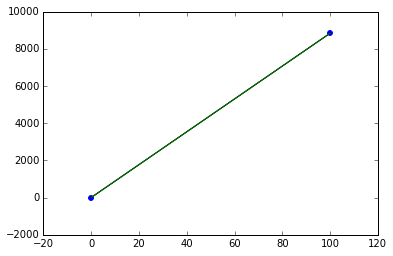

In [210]:
aim = [100.0000, 88.3983]
data = [
[0.0001, 88.3983],
[99.9999, 88.3984] ]

#aim = [1000000, 883983]
#data = [ [1, 883983], [999999, 883984] ]


data = [ [pair[0], pair[0]*pair[1]] for pair in data ]
extpts = [Point(0,0)]
for (x,y) in data:
    pt = Point(x, y)
    points = extpts[:] + [Point(p.x + pt.x, p.y + pt.y) for p in extpts]
    extpts = FindExtremePoints( points, False )

aim = [aim[0], aim[0] * aim[1]]
scale = 1
aim = Point(aim[0] / scale, aim[1] / scale)

fig, ax = plt.subplots()
ax.scatter([pt.x for pt in extpts], [pt.y for pt in extpts], color = "blue")
for i in range(len(extpts)-1):
    ax.plot( [extpts[i].x, extpts[i+1].x], [extpts[i].y, extpts[i+1].y], color = "black" )
ax.plot( [extpts[-1].x, extpts[0].x], [extpts[-1].y, extpts[0].y], color = "black" )
ax.plot( [0, aim[0]], [0, aim[1]], color = "green" )
extpts, aim

In [211]:
FindMinScale(extpts, Point(aim[0], aim[1]))

0

## Convert to integers

My convex hull finding code will work with just integers, which preserves accuracy.  So, if we can convert the input to integers, we have won, in some sense.

In [229]:
def ScaleFloats(data):
    """Pass a list of floating point numbers, as strings of the from "12" or "5.2300"
    but _not_ exponential format.  Finds a power of 10 to multiply them all by so they
    become integers, and returns this list of integers."""
    dataParts = [ x.split(".") for x in data ]
    scalePower = [len(x[1]) for x in dataParts if len(x) > 1]
    scalePower = max(scalePower) if len(scalePower) > 0 else 0
    newData = []
    for x in dataParts:
        b = x[1] if len(x) > 1 else ""
        b = b + "0"*(scalePower - len(b))
        newData.append( int(x[0] + b) )
    return newData

ScaleFloats(["12.00100", "5.042", "07.51123"])

[1200100, 504200, 751123]

In [1]:
x=list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
x[3::2]

[3, 5, 7, 9]